# Proyecto 3

## Aprendizaje Colaborativo Internacional en Línea

Esta tarea se encuentra en el marco de la aplicación del programa de Aprendizaje Colaborativo Internacional en Línea (COIL – siglas en inglés de “Collaborative Online International Learning”) de la Asociación de Universidades Confiadas a la Compañía de Jesús en América Latina (AUSJAL).

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests

El siguiente análisis busca responder la pregunta: 
## ¿Existe una correlación estadísticamente significativa entre la tasa de empleo y el PIB en México, Japón y Estados Unidos entre 2019 y 2023? ¿Cómo difiere esta relación entre los países, y qué impacto ha tenido sobre los distintos sectores productivos?

El domino a estudiar es: México, Estados Unidos y Japón
Las variables estudiadas son: Tasa de empleo, PIB

In [112]:
# Función para obtener datos de un país
def get_employment_rate(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/V2/country/{country_code}/indicator/SL.EMP.TOTL.SP.ZS"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}",
        "per_page": 100
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:  # Verifica que haya datos disponibles
            return data[1]  
    return []

# Obtener datos para los países
countries = {"Mexico": "MEX", "USA": "USA", "Japan": "JPN"}
start_year = 2019
end_year = 2023

# Crear un DataFrame para almacenar los resultados
results = []

for country, code in countries.items():
    data = get_employment_rate(code, start_year, end_year)
    for entry in data:
        if "date" in entry and "value" in entry:
            results.append({
                "Country": country,
                "Year": entry["date"],
                "Employment Rate (%)": entry["value"]
            })

# Convertir los resultados a un DataFrame de pandas
employment_df = pd.DataFrame(results)

# Asegurarte de que los resultados estén ordenados por País y Año
employment_df = employment_df.sort_values(by=["Country", "Year"])

# Imprimir el DataFrame en consola con líneas y orden
print(employment_df.to_string(index=False))

Country Year  Employment Rate (%)
  Japan 2019               60.553
  Japan 2020               60.209
  Japan 2021               60.362
  Japan 2022               60.875
  Japan 2023               61.244
 Mexico 2019               59.038
 Mexico 2020               53.977
 Mexico 2021               57.486
 Mexico 2022               59.013
 Mexico 2023               59.782
    USA 2019               60.329
    USA 2020               56.380
    USA 2021               57.946
    USA 2022               59.266
    USA 2023               59.600


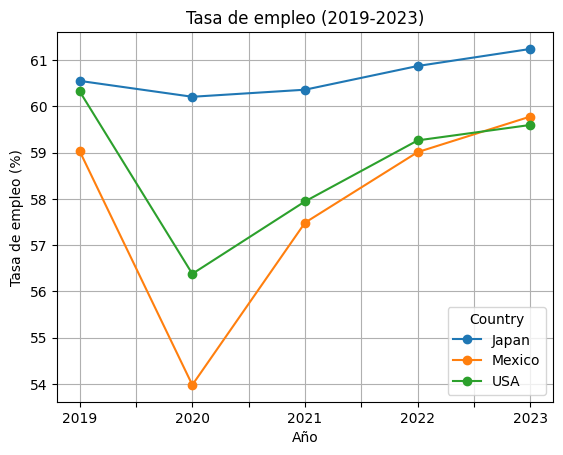

In [113]:
# Usar el dataframe para crear una visualización

df.pivot(index="Year", columns="Country", values="Employment Rate (%)").plot(kind="line", marker='o')
plt.title("Tasa de empleo (2019-2023)")
plt.ylabel("Tasa de empleo (%)")
plt.xlabel("Año")
plt.grid(True)
plt.show()

## Identificación de tendencias generales

### Japón:
La línea azul muestra que la tasa de empleo se mantuvo relativamente estable durante todo el período.
Hay un ligero aumento luego de 2020, lo que podría indicar una recuperación o estabilidad económica.
### México:
La línea naranja muestra una caída abrupta en 2020, probablemente debido a la pandemia de COVID-19, seguida de una recuperación constante hasta 2023.
Aunque recupera niveles similares a 2019, parece haber sido más afectado por el evento económico de 2020.
### Estados Unidos:
La línea verde muestra una caída menos pronunciada en 2020 en comparación con México, pero aún refleja un impacto notable.
Después de 2020, la tasa de empleo aumenta de manera constante, acercándose a niveles previos a la pandemia.

## Comparaciones entre países
Japón tiene la tasa de empleo más alta durante todo el período, lo que podría reflejar un mercado laboral más estable o políticas económicas que mitigaron los efectos de la pandemia.
México muestra la mayor variabilidad, lo que podría estar relacionado con mayor dependencia de ciertos sectores más afectados por la pandemia, como servicios o manufactura.
Estados Unidos se sitúa entre Japón y México en cuanto a estabilidad y recuperación. Aunque experimenta una caída en 2020, la recuperación es consistente.

## Impacto del año 2020
El año 2020 muestra una caída clara en la tasa de empleo en todos los países, lo que probablemente se relaciona con el impacto de la pandemia de COVID-19.
La magnitud de la caída varía: México es el más afectado, seguido por Estados Unidos, mientras que Japón se mantiene más estable.

## Análisis post-recuperación (2021-2023)
En todos los países, la recuperación comienza en 2021.
Japón tiene una recuperación constante, lo que podría reflejar medidas estructurales sólidas.
Estados Unidos sigue una trayectoria similar a Japón, pero su recuperación es más moderada.
México recupera más rápidamente desde 2021, pero aún podría estar más vulnerable a shocks externos.


In [114]:
# Función para obtener datos del PIB
def get_gdp_data(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/V2/country/{country_code}/indicator/NY.GDP.MKTP.KD"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}",
        "per_page": 100
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:  # Verifica que haya datos disponibles
            return data[1]  # Los datos están en el segundo elemento del JSON
    return []

# Obtener datos para los países
countries = {"Mexico": "MEX", "USA": "USA", "Japan": "JPN"}
start_year = 2019
end_year = 2023

# Crear un DataFrame para almacenar los resultados
gdp_results = []

for country, code in countries.items():
    data = get_gdp_data(code, start_year, end_year)
    for entry in data:
        if "date" in entry and "value" in entry:
            gdp_results.append({
                "Country": country,
                "Year": entry["date"],
                "GDP (constant USD)": entry["value"]
            })

# Convertir los resultados a un DataFrame
gdp_df = pd.DataFrame(gdp_results)
gdp_df["GDP (Billion USD)"] = gdp_df["GDP (constant USD)"] / 1e9
gdp_df = gdp_df.sort_values(by=["Country", "Year"])

# Mostrar resultados
print(gdp_df)

   Country  Year  GDP (constant USD)  GDP (Billion USD)
14   Japan  2019        4.564333e+12        4564.332550
13   Japan  2020        4.375044e+12        4375.044252
12   Japan  2021        4.487016e+12        4487.015645
11   Japan  2022        4.529855e+12        4529.854841
10   Japan  2023        4.616966e+12        4616.966465
4   Mexico  2019        1.279495e+12        1279.495263
3   Mexico  2020        1.169144e+12        1169.144481
2   Mexico  2021        1.236244e+12        1236.244118
1   Mexico  2022        1.285063e+12        1285.063398
0   Mexico  2023        1.326555e+12        1326.554713
9      USA  2019        2.013669e+13       20136.688111
8      USA  2020        1.969097e+13       19690.968695
7      USA  2021        2.083309e+13       20833.085468
6      USA  2022        2.123631e+13       21236.308982
5      USA  2023        2.177628e+13       21776.284674


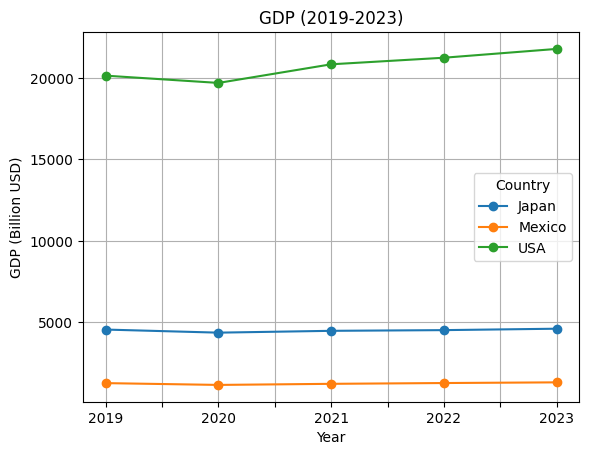

In [115]:
# Crear una gráfica para visualizar los datos

gdp_df.pivot(index="Year", columns="Country", values="GDP (Billion USD)").plot(kind="line", marker='o')
plt.title("GDP (2019-2023)")
plt.ylabel("GDP (Billion USD)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

## Análisis

### Diferencias significativas en magnitud
Estados Unidos:
La línea verde muestra que Estados Unidos tiene un PIB mucho más alto que los otros dos países, con valores consistentemente superiores a 20 billones de USD.
Esto refleja su posición como la economía más grande del mundo durante este período.
Japón:
La línea azul indica que Japón tiene un PIB estable entre 4.5 y 5 billones de USD. Es significativamente menor al de Estados Unidos, pero consistentemente más alto que México.
México:
La línea naranja muestra que México tiene el PIB más bajo de los tres países, por debajo de 1.5 billones de USD, lo que destaca la diferencia en escala económica.

### Estabilidad y crecimiento
Estados Unidos:
Aunque el PIB de Estados Unidos ya es alto, se observa un crecimiento moderado a lo largo del período, particularmente después de 2020. Esto podría reflejar una recuperación económica tras la pandemia.
Japón:
El PIB japonés muestra una estabilidad marcada, con ligeros aumentos pero sin cambios dramáticos. Esto puede estar relacionado con una economía madura y menos dependiente del crecimiento rápido.
México:
El PIB mexicano permanece constante, sin un crecimiento notable entre 2019 y 2023. Esto podría reflejar desafíos estructurales en su economía o una recuperación más lenta tras la pandemia.

### Comparaciones y conclusiones
Estados Unidos lidera con una economía robusta, y su crecimiento continuo puede ser un reflejo de fuertes políticas monetarias y fiscales, así como de su diversificada base económica.
Japón tiene una economía madura y estable, con un PIB que no muestra grandes variaciones, lo que podría indicar estabilidad estructural pero también limitaciones en su capacidad de expansión.
México enfrenta desafíos para crecer a un ritmo comparable, lo que puede estar relacionado con dependencias estructurales o una mayor vulnerabilidad a crisis globales.


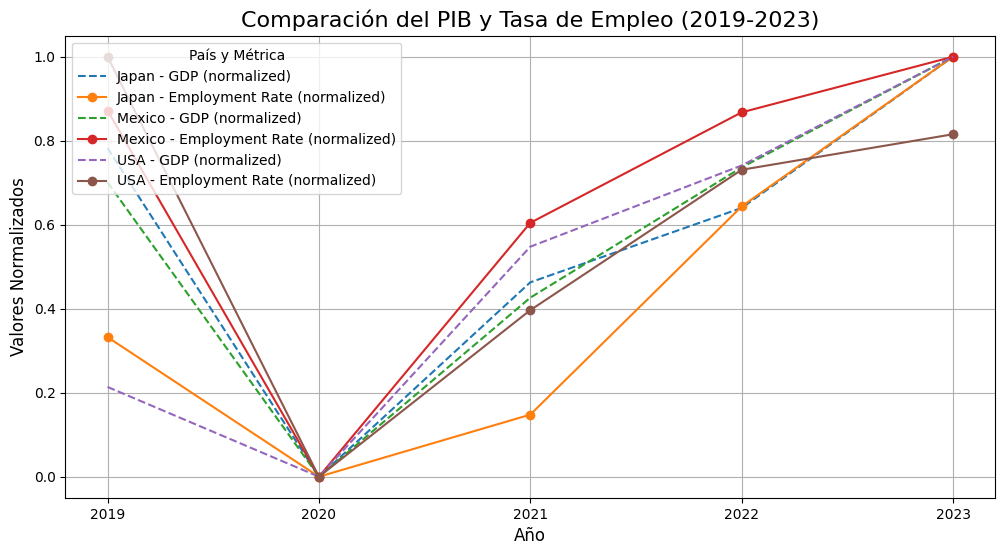

In [116]:
# Combina los DataFrames de PIB y empleo en uno
combined_df = pd.merge(
    gdp_df.rename(columns={"GDP (constant USD)": "GDP"}), 
    employment_df.rename(columns={"Employment Rate (%)": "Employment Rate"}), 
    on=["Country", "Year"]
)

# Ordenar el DataFrame por País y Año
combined_df = combined_df.sort_values(by=["Country", "Year"])

# Normalizar los datos
combined_df["Normalized GDP"] = combined_df.groupby("Country")["GDP"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
combined_df["Normalized Employment Rate"] = combined_df.groupby("Country")["Employment Rate"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Crear gráfico
plt.figure(figsize=(12, 6))

# Iterar sobre los países
for country in combined_df["Country"].unique():
    country_data = combined_df[combined_df["Country"] == country]
    plt.plot(country_data["Year"], country_data["Normalized GDP"], label=f"{country} - GDP (normalized)", linestyle='--')
    plt.plot(country_data["Year"], country_data["Normalized Employment Rate"], label=f"{country} - Employment Rate (normalized)", marker='o')

# Personalizar gráfico
plt.title("Comparación del PIB y Tasa de Empleo (2019-2023)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Valores Normalizados", fontsize=12)
plt.legend(title="País y Métrica", fontsize=10, loc="upper left")
plt.grid(True)
plt.show()

## Análisis

En esta gráfica, los valores normalizados del PIB y la Tasa de Empleo para los tres países son comparados en una escala común, sin importar las unidades o magnitudes de cada país. Al normalizar las métricas, podemos observar las tendencias y las relaciones entre estas dos variables (PIB y tasa de empleo) en todos los países a lo largo del tiempo.

### PIB Normalizado: 

A lo largo de los años, el PIB normalizado muestra una caída pronunciada en 2020 para todos los países, lo que refleja la crisis económica global (por ejemplo, la pandemia de COVID-19). Sin embargo, después de 2020, todos los países muestran una tendencia de recuperación, aunque en diferentes ritmos.

### Tasa de Empleo Normalizada: 

Similar al PIB, la tasa de empleo también experimenta una caída en 2020. Después de esta caída, se observa una recuperación progresiva, indicando que el mercado laboral está mejorando aunque no necesariamente al mismo ritmo que el PIB. La normalización permite ver cómo la tasa de empleo de todos los países sigue una trayectoria comparable.

### Relación entre PIB y Tasa de Empleo:

A lo largo del período de 2019 a 2023, parece que la tasa de empleo en México y Estados Unidos muestra una recuperación más rápida comparada con el PIB, lo que podría indicar una recuperación en el empleo, incluso cuando la economía no ha vuelto a los niveles pre-pandemia.
Japón, por otro lado, muestra una desaceleración tanto en el PIB como en la tasa de empleo, con un ritmo de recuperación más lento, lo que podría sugerir que las dificultades económicas en Japón podrían haber tenido un impacto más duradero en el empleo.

## Conclusión:
México y Estados Unidos han tenido una recuperación más rápida en términos de empleo, a pesar de la caída del PIB en 2020.
Japón experimenta una caída tanto en su PIB como en su tasa de empleo, con una recuperación más lenta en comparación con los otros dos países.


### La correlación de Pearson es una medida estadística que se utiliza para determinar la relación lineal entre dos variables. En este caso, se podría usar para evaluar si el PIB y la Tasa de Empleo están relacionadas.

In [120]:
for country in countries:
    country_data = combined_df[combined_df["Country"] == country]
    corr_value = country_data["GDP"].corr(country_data["Employment Rate"])
    print(f"Correlación entre PIB y Tasa de Empleo en {country}: {corr_value}")

Correlación entre PIB y Tasa de Empleo en Japan: 0.8486600466965871
Correlación entre PIB y Tasa de Empleo en Mexico: 0.975153343978541
Correlación entre PIB y Tasa de Empleo en USA: 0.49754407791061417


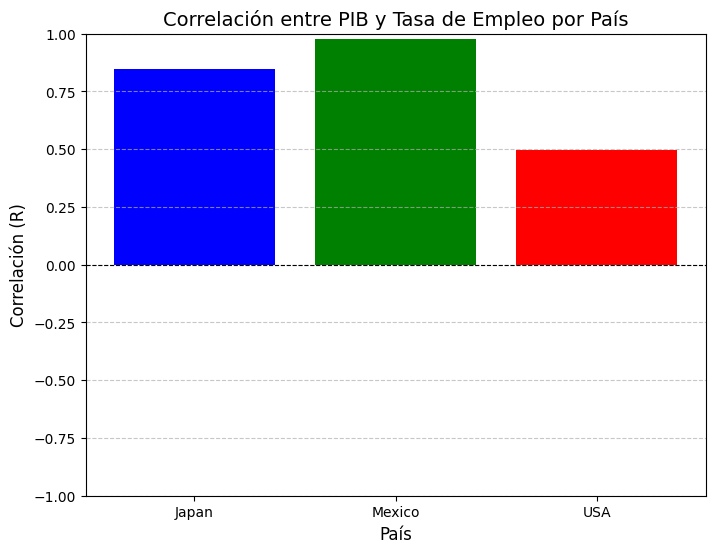

In [118]:
import matplotlib.pyplot as plt

# Lista de países y sus correlaciones
countries = []
correlations = []

# Calcular las correlaciones y almacenar los resultados
for country in combined_df["Country"].unique():
    country_data = combined_df[combined_df["Country"] == country]
    corr_value = country_data["GDP"].corr(country_data["Employment Rate"])
    countries.append(country)
    correlations.append(corr_value)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(countries, correlations, color=["blue", "green", "red"])
plt.title("Correlación entre PIB y Tasa de Empleo por País", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Correlación (R)", fontsize=12)
plt.ylim(-1, 1)  # Limitar el rango de correlación
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Línea en y=0
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



## Análisis

Japón (azul): La correlación es alta, cerca de 0.75, lo que indica una relación positiva fuerte entre el PIB y la tasa de empleo.
México (verde): Presenta la correlación más alta, cercana a 1, lo que sugiere una relación casi perfecta entre ambas variables.
EE.UU. (rojo): Tiene la correlación más baja, alrededor de 0.5, lo que indica una relación moderada entre el PIB y la tasa de empleo.

México parece ser el país con mayor dependencia entre el crecimiento del PIB y la tasa de empleo.
Japón también muestra una correlación fuerte, aunque menor que la de México.
En EE.UU., aunque la correlación es positiva, es más moderada, lo que podría reflejar que otros factores, además del PIB, influyen en la tasa de empleo.

### Regresión lineal

La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente y una o más variables independientes. En este caso, se utiliza para examinar cómo el PIB puede predecir la Tasa de Empleo. Al ajustar una línea recta a los datos, la regresión lineal permite estimar el impacto del PIB en la tasa de empleo y evaluar la fuerza de esta relación.

Regresión lineal para Japan:
  Pendiente (Coeficiente): 3.856863446142339e-12
  Intersección (Intercepto): 43.23623940221907
  R² (Coeficiente de determinación): 0.7202238748590511


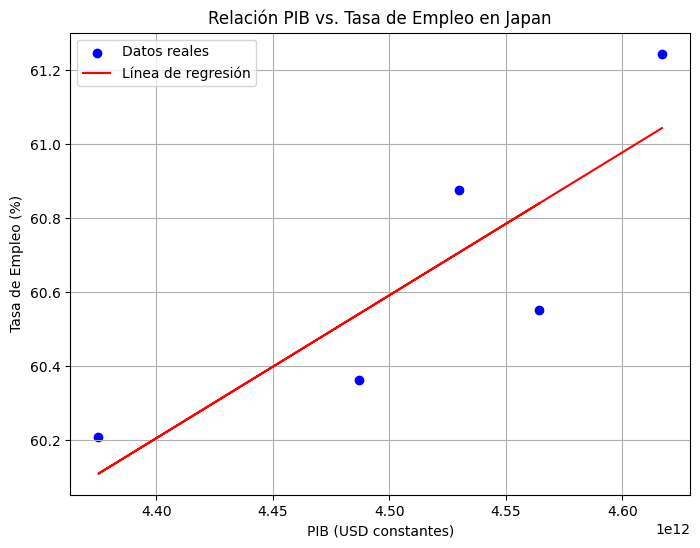

Regresión lineal para Mexico:
  Pendiente (Coeficiente): 3.7985181703453974e-11
  Intersección (Intercepto): 10.024445697358338
  R² (Coeficiente de determinación): 0.9509240442725304


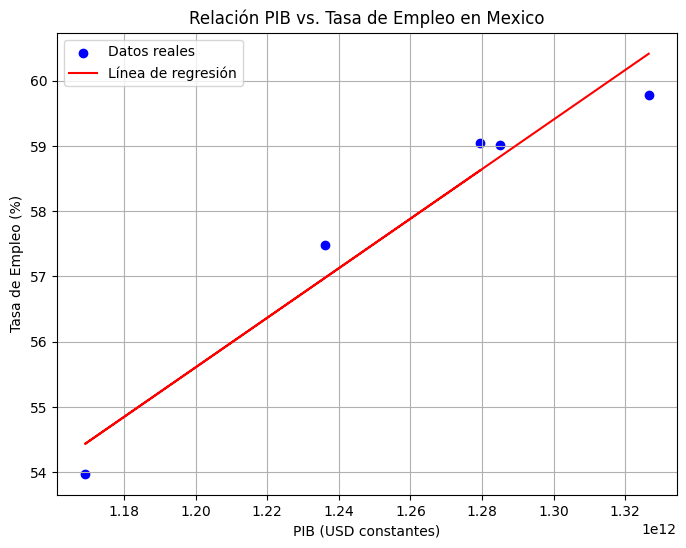

Regresión lineal para USA:
  Pendiente (Coeficiente): 9.288507243818077e-13
  Intersección (Intercepto): 39.44478936448005
  R² (Coeficiente de determinación): 0.24755010946392209


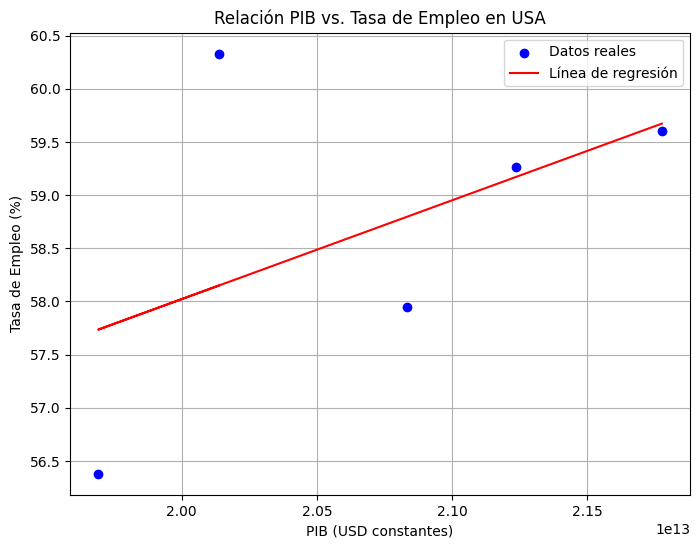

In [119]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Iterar por cada país
countries = combined_df["Country"].unique()

for country in countries:
    # Filtrar datos del país
    country_data = combined_df[combined_df["Country"] == country]
    
    # Variables independientes y dependientes
    X = country_data["GDP"].values.reshape(-1, 1)  # PIB
    y = country_data["Employment Rate"].values     # Tasa de empleo

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)
    
    # Predicción de valores
    y_pred = model.predict(X)
    
    # Resultados del modelo
    print(f"Regresión lineal para {country}:")
    print(f"  Pendiente (Coeficiente): {model.coef_[0]}")
    print(f"  Intersección (Intercepto): {model.intercept_}")
    print(f"  R² (Coeficiente de determinación): {model.score(X, y)}\n")
    
    # Gráfico de dispersión y línea de regresión
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color="blue", label="Datos reales")
    plt.plot(X, y_pred, color="red", label="Línea de regresión")
    plt.title(f"Relación PIB vs. Tasa de Empleo en {country}")
    plt.xlabel("PIB (USD constantes)")
    plt.ylabel("Tasa de Empleo (%)")
    plt.legend()
    plt.grid(True)
    plt.show()


## Análisis

### Estados Unidos:

La gráfica muestra un PIB (en términos constantes) en el eje horizontal y la tasa de empleo (%) en el eje vertical.
Existe una tendencia positiva entre el PIB y la tasa de empleo, como indica la pendiente de la línea de regresión. Esto sugiere que un mayor PIB está asociado con una tasa de empleo más alta en Estados Unidos.
Sin embargo, los puntos de datos presentan cierta dispersión, lo que indica que la relación no es perfecta. Es probable que factores adicionales influyan en la tasa de empleo.

### México:

En México, también se observa una relación positiva entre el PIB y la tasa de empleo, con una pendiente de la línea de regresión similar.
En este caso, los puntos de datos parecen estar más alineados con la línea de regresión que en el caso de Estados Unidos. Esto indica una relación más consistente entre las dos variables en México.

### Japón:

Para Japón, la relación también es positiva, como lo indica la línea de regresión ascendente.
Sin embargo, los puntos presentan más dispersión que en el caso de México, aunque menos que en el de Estados Unidos.

### Análisis conjunto
En los tres países, se observa una relación positiva entre el PIB y la tasa de empleo, lo cual es consistente con teorías económicas que sugieren que un mayor nivel de actividad económica (medido por el PIB) tiende a generar más empleos.

### Diferencias clave:

Dispersión: La relación parece más consistente en México, seguido de Japón y, finalmente, Estados Unidos, donde se aprecia mayor dispersión.
Pendientes: La pendiente de la línea de regresión refleja cómo cambia la tasa de empleo con respecto a cambios en el PIB. Sin acceso a los valores exactos de las pendientes, visualmente parecen similares, aunque la sensibilidad podría variar.

## Conclusión
La relación positiva entre el PIB y la tasa de empleo es evidente en los tres países. Sin embargo, factores específicos de cada economía (como políticas de empleo, estructura económica, y volatilidad del mercado laboral) pueden influir en el grado de dispersión y la fuerza de la relación. México parece mostrar la conexión más consistente, mientras que en Estados Unidos otros factores podrían estar jugando un rol más prominente en la tasa de empleo.